**Section 1: Dataset obtained**

In [ ]:
pip install imdbpy

     |████████████████████████████████| 298 kB 4.2 MB/s 


In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=68dfcf92378ec6a028b311b2c81e001ec05ddec8c3841034bcb9f78fc7e03e14
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
pip install tmdbsimple

In [ ]:
import urllib.request
import requests
import json
import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import pickle as pkl

In [ ]:
api_key = 'cca7512b963db8aa84ed7e1abe3be199' 
url = 'https://api.themoviedb.org/3/movie/550?api_key=cca7512b963db8aa84ed7e1abe3be199'
data = urllib.request.urlopen(url).read()
dataDict = json.loads(data)

In [ ]:
poster_folder='posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+poster_folder)

In [ ]:
tmdb.API_KEY = api_key 
search = tmdb.Search()

In [ ]:
def get_movie_id_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    return movie_id

In [ ]:
def get_movie_info_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    info=movie.info()
    return info

In [ ]:
def get_movie_genres_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

In [ ]:
def get_movie_overview_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    overview=movie.info()['overview']
    return genres

**Popular** **Movie** **Dataset**

In [ ]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()

print(len(top_movies['results']))
popular_movs=top_movies['results']

20


Obtain Top 10,000 popular movies from TMDb

In [ ]:
all_movies=tmdb.Movies()
top10000_movies=[]
print('Pulling movie list, Please wait...')
for i in range(1,501):
    if i%15==0:
        time.sleep(7)
    movies_on_this_page=all_movies.popular(page=i)['results']
    top10000_movies.extend(movies_on_this_page)
len(top10000_movies)
f3=open('movie_list_week12.pckl','wb')
pickle.dump(top10000_movies,f3)
f3.close()
print('Done!')

Pulling movie list, Please wait...
Done!


In [78]:
f3=open('movie_list_week12.pckl','rb')
top10000_movies_week12=pickle.load(f3)
f3.close()

In [79]:
len(top10000_movies_week12)

10000

In [80]:
import pandas as pd
with open("movie_list_week12.pckl", "rb") as f:
    object = pkl.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'top10000_movies_week12.csv')

In [81]:
with open('top10000_movies_week12.csv', 'r') as f:
    print(len(f.readlines()))

10033


In [82]:
import pandas as pd

df = pd.read_csv('top10000_movies_week12.csv', index_col=None, header=0, engine='python' )

In [83]:
data = df.values

In [84]:
colnames = df.columns
colnames

Index(['Unnamed: 0', 'adult', 'backdrop_path', 'genre_ids', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'release_date', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [90]:
# Delete movies without posters
df2=df.dropna(subset=['poster_path'])
#Based on user evaluation feedback, we decided to delete movies without poster movie information

In [91]:
df2.isnull().any()
# Check whether there is a null value in the movie poster column -->'poster_path'

Unnamed: 0           False
adult                False
backdrop_path         True
genre_ids            False
id                   False
original_language    False
original_title       False
overview              True
popularity           False
poster_path          False
release_date          True
title                False
video                False
vote_average         False
vote_count           False
dtype: bool

In [92]:
df2.isnull().sum()

Unnamed: 0             0
adult                  0
backdrop_path        338
genre_ids              0
id                     0
original_language      0
original_title         0
overview              89
popularity             0
poster_path            0
release_date          29
title                  0
video                  0
vote_average           0
vote_count             0
dtype: int64

Add 'popularity' 

In [97]:
df2.to_csv('Top10000_week12.csv', columns=['title', 'overview', 'genre_ids', 'id', 'popularity'])

In [98]:
with open('Top10000_week12.csv', 'r') as f:
    print(len(f.readlines()))

9992


***Upcoming movie***

In [ ]:
all_movies=tmdb.Movies()
upcoming_movies=all_movies.upcoming()

print(len(upcoming_movies['results']))
upcoming_movs=top_movies['results']

20


In [ ]:
all_movies=tmdb.Movies()
upcoming1000_movies=[]
print('Pulling movie list, Please wait...')
for i in range(1,51):
    if i%15==0:
        time.sleep(7)
    movies_on_this_page=all_movies.upcoming(page=i)['results']
    upcoming1000_movies.extend(movies_on_this_page)
len(upcoming1000_movies)
f4=open('upcoming_movie_list_week12.pckl','wb')
pickle.dump(upcoming1000_movies,f4)
f4.close()
print('Done!')

Pulling movie list, Please wait...
Done!


In [ ]:
f4=open('upcoming_movie_list_week12.pckl','rb')
upcoming1000_movies_week12=pickle.load(f4)
f4.close()

In [99]:
len(upcoming1000_movies_week12)

836

**600+ upcoming movies for week10**

In [100]:
with open("upcoming_movie_list_week12.pckl", "rb") as f:
    object = pkl.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'upcoming_movies_week12.csv')

In [101]:
len(upcoming1000_movies_week12)

836

In [107]:
df_1 = pd.read_csv('upcoming_movies_week12.csv', index_col=None, header=0, engine='python')
data = df_1.values

In [108]:
df_1.isnull().any()

Unnamed: 0           False
adult                False
backdrop_path         True
genre_ids            False
id                   False
original_language    False
original_title       False
overview              True
popularity           False
poster_path           True
release_date         False
title                False
video                False
vote_average         False
vote_count           False
dtype: bool

In [109]:
# Delete movies without posters
df3=df_1.dropna(subset=['poster_path'])
#Based on user evaluation feedback, we decided to delete movies without poster movie information

In [112]:
df3.isnull().any()

Unnamed: 0           False
adult                False
backdrop_path         True
genre_ids            False
id                   False
original_language    False
original_title       False
overview              True
popularity           False
poster_path          False
release_date         False
title                False
video                False
vote_average         False
vote_count           False
dtype: bool

In [113]:
df3.to_csv('Upcoming_week12.csv', columns=['title', 'overview', 'genre_ids', 'id', 'popularity'])

In [114]:
with open('Upcoming_week12.csv', 'r') as f:
    print(len(f.readlines()))

577


In [115]:
data1=pd.read_csv("Upcoming_week12.csv")

In [116]:
data2= pd.read_csv('Top10000_week12.csv', index_col=None, header=0, engine='python')

In [117]:
frames = [data1, data2]
result = pd.concat(frames)

In [118]:
len(result)

10550

In [119]:
len(data1)

576

In [120]:
len(data2)

9974

In [121]:
result.head()

,Unnamed: 0,title,overview,genre_ids,id,popularity
0,0,Clifford the Big Red Dog,As Emily struggles to fit in at home and at sc...,"[16, 35, 10751]",585245,2734.004
1,1,Encanto,"The tale of an extraordinary family, the Madri...","[12, 16, 35, 10751, 14, 10402]",568124,2744.462
2,2,Ron's Gone Wrong,"In a world where walking, talking, digitally c...","[16, 878, 10751, 35]",482321,2221.171
3,3,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,"[28, 12, 878]",634649,2098.473
4,4,No Time to Die,Bond has left active service and is enjoying a...,"[12, 28, 53]",370172,1606.287


In [122]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10550 entries, 0 to 9973
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10550 non-null  int64  
 1   title       10550 non-null  object 
 2   overview    10387 non-null  object 
 3   genre_ids   10550 non-null  object 
 4   id          10550 non-null  int64  
 5   popularity  10550 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 577.0+ KB


In [123]:
any(result.duplicated('id')) # Duplicate ID was found in this table

True

In [127]:
result.to_csv('result_week12.csv')

In [128]:
result

,Unnamed: 0,title,overview,genre_ids,id,popularity
0,0,Clifford the Big Red Dog,As Emily struggles to fit in at home and at sc...,"[16, 35, 10751]",585245,2734.004
1,1,Encanto,"The tale of an extraordinary family, the Madri...","[12, 16, 35, 10751, 14, 10402]",568124,2744.462
2,2,Ron's Gone Wrong,"In a world where walking, talking, digitally c...","[16, 878, 10751, 35]",482321,2221.171
3,3,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,"[28, 12, 878]",634649,2098.473
4,4,No Time to Die,Bond has left active service and is enjoying a...,"[12, 28, 53]",370172,1606.287
...,...,...,...,...,...,...
9969,10009,Joint Security Area,After a shooting incident at the North/South K...,"[10752, 18, 53, 28]",2440,13.029
9970,10010,Silent Night,The police force of a remote Midwestern town s...,"[35, 27, 53, 9648]",139455,12.032
9971,10011,The Astronaut Farmer,Texan Charles Farmer left the Air Force as a y...,"[878, 12, 35, 18]",5172,12.780
9972,10012,Hanasaku Iroha: Home Sweet Home,While sorting through a mess of books in the s...,"[16, 18, 35]",229756,12.932


In [129]:
result.dtypes

Unnamed: 0      int64
title          object
overview       object
genre_ids      object
id              int64
popularity    float64
dtype: object

In [130]:
any(result.duplicated('id')) #ID is duplicate

True

In [158]:
result.isnull().any() #Missing value query

Unnamed: 0    False
title         False
overview       True
genre_ids     False
id            False
popularity    False
dtype: bool

In [157]:
result.isnull().sum() 

Unnamed: 0      0
title           0
overview      163
genre_ids       0
id              0
popularity      0
dtype: int64

In [162]:
result_2 = result.drop_duplicates(subset='id', keep='first', inplace=False) 
#Delete duplicate ID

In [163]:
len(result_2)

10428

In [165]:
any(result_2.duplicated('id')) 

False

In [166]:
no_missing_result = result_2.dropna() 

In [167]:
len(no_missing_result)

10265

In [168]:
no_missing_result.isnull().sum()

Unnamed: 0    0
title         0
overview      0
genre_ids     0
id            0
popularity    0
dtype: int64

In [169]:
no_missing_result.to_csv('no_missing_result_week12.csv')

Obtain the target data set, and then perform label separation processing on the data set.

**Section 2: Data processing**

In [190]:
df=pd.read_csv("no_missing_result_week12.csv")

In [191]:
df

,Unnamed: 0,Unnamed: 0.1,title,overview,genre_ids,id,popularity
0,0,0,Clifford the Big Red Dog,As Emily struggles to fit in at home and at sc...,"[16, 35, 10751]",585245,2734.004
1,1,1,Encanto,"The tale of an extraordinary family, the Madri...","[12, 16, 35, 10751, 14, 10402]",568124,2744.462
2,2,2,Ron's Gone Wrong,"In a world where walking, talking, digitally c...","[16, 878, 10751, 35]",482321,2221.171
3,3,3,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,"[28, 12, 878]",634649,2098.473
4,4,4,No Time to Die,Bond has left active service and is enjoying a...,"[12, 28, 53]",370172,1606.287
...,...,...,...,...,...,...,...
10260,9969,10009,Joint Security Area,After a shooting incident at the North/South K...,"[10752, 18, 53, 28]",2440,13.029
10261,9970,10010,Silent Night,The police force of a remote Midwestern town s...,"[35, 27, 53, 9648]",139455,12.032
10262,9971,10011,The Astronaut Farmer,Texan Charles Farmer left the Air Force as a y...,"[878, 12, 35, 18]",5172,12.780
10263,9972,10012,Hanasaku Iroha: Home Sweet Home,While sorting through a mess of books in the s...,"[16, 18, 35]",229756,12.932


In [192]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
title           0
overview        0
genre_ids       0
id              0
popularity      0
dtype: int64

In [193]:
genre = df['genre_ids']
genre

0                       [16, 35, 10751]
1        [12, 16, 35, 10751, 14, 10402]
2                  [16, 878, 10751, 35]
3                         [28, 12, 878]
4                          [12, 28, 53]
                      ...              
10260               [10752, 18, 53, 28]
10261                [35, 27, 53, 9648]
10262                 [878, 12, 35, 18]
10263                      [16, 18, 35]
10264                              [35]
Name: genre_ids, Length: 10265, dtype: object

In [194]:
genre = genre.str.strip('[]')
genre

0                       16, 35, 10751
1        12, 16, 35, 10751, 14, 10402
2                  16, 878, 10751, 35
3                         28, 12, 878
4                          12, 28, 53
                     ...             
10260               10752, 18, 53, 28
10261                35, 27, 53, 9648
10262                 878, 12, 35, 18
10263                      16, 18, 35
10264                              35
Name: genre_ids, Length: 10265, dtype: object

In [195]:
genre1=genre.to_frame()
genre1

,genre_ids
0,"16, 35, 10751"
1,"12, 16, 35, 10751, 14, 10402"
2,"16, 878, 10751, 35"
3,"28, 12, 878"
4,"12, 28, 53"
...,...
10260,"10752, 18, 53, 28"
10261,"35, 27, 53, 9648"
10262,"878, 12, 35, 18"
10263,"16, 18, 35"


In [196]:
y = pd.DataFrame((x.split(',') for x in genre))
y

,0,1,2,3,4,5,6,7
0,16,35,10751,None,None,None,None,None
1,12,16,35,10751,14,10402,None,None
2,16,878,10751,35,None,None,None,None
3,28,12,878,None,None,None,None,None
4,12,28,53,None,None,None,None,None
...,...,...,...,...,...,...,...,...
10260,10752,18,53,28,None,None,None,None
10261,35,27,53,9648,None,None,None,None
10262,878,12,35,18,None,None,None,None
10263,16,18,35,None,None,None,None,None


In [197]:
nmr=df[['title', 'id', 'overview', 'genre_ids','popularity']]
nmr

,title,id,overview,genre_ids,popularity
0,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,"[16, 35, 10751]",2734.004
1,Encanto,568124,"The tale of an extraordinary family, the Madri...","[12, 16, 35, 10751, 14, 10402]",2744.462
2,Ron's Gone Wrong,482321,"In a world where walking, talking, digitally c...","[16, 878, 10751, 35]",2221.171
3,Spider-Man: No Way Home,634649,Peter Parker is unmasked and no longer able to...,"[28, 12, 878]",2098.473
4,No Time to Die,370172,Bond has left active service and is enjoying a...,"[12, 28, 53]",1606.287
...,...,...,...,...,...
10260,Joint Security Area,2440,After a shooting incident at the North/South K...,"[10752, 18, 53, 28]",13.029
10261,Silent Night,139455,The police force of a remote Midwestern town s...,"[35, 27, 53, 9648]",12.032
10262,The Astronaut Farmer,5172,Texan Charles Farmer left the Air Force as a y...,"[878, 12, 35, 18]",12.780
10263,Hanasaku Iroha: Home Sweet Home,229756,While sorting through a mess of books in the s...,"[16, 18, 35]",12.932


In [198]:
df=pd.merge(nmr, y, left_index=True,right_index=True)
dx=nmr.copy()
dx=nmr[0:0]
dx

,title,id,overview,genre_ids,popularity


In [199]:
dx

,title,id,overview,genre_ids,popularity


In [200]:
df.iloc[:,5:12]

,0,1,2,3,4,5,6
0,16,35,10751,None,None,None,None
1,12,16,35,10751,14,10402,None
2,16,878,10751,35,None,None,None
3,28,12,878,None,None,None,None
4,12,28,53,None,None,None,None
...,...,...,...,...,...,...,...
10260,10752,18,53,28,None,None,None
10261,35,27,53,9648,None,None,None
10262,878,12,35,18,None,None,None
10263,16,18,35,None,None,None,None


In [201]:
len(df)

10265

In [183]:
from tqdm.notebook import tqdm
import numpy as np 
from time import sleep

In [202]:
for i in tqdm(range(len(df))):
    a=df[i:i+1]
    a=a.iloc[:,5:12].dropna(axis=1, how='any')
    a_list =np.array(a).tolist()
    popularity=df.loc[i,'popularity']
    title=df.loc[i,'title']
    id=df.loc[i,'id']
    overview=df.loc[i,'overview']
    for j in a_list[0]:
        dx = dx.append([{'title': title,'id': id,'overview':overview,'popularity':popularity,'genre_ids':j}], ignore_index=True)

dx=dx[-(dx['genre_ids']=='')].reset_index(drop=True)

  0%|          | 0/10265 [00:00<?, ?it/s]

In [203]:
dx

,title,id,overview,genre_ids,popularity
0,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,16,2734.004
1,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,35,2734.004
2,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,10751,2734.004
3,Encanto,568124,"The tale of an extraordinary family, the Madri...",12,2744.462
4,Encanto,568124,"The tale of an extraordinary family, the Madri...",16,2744.462
...,...,...,...,...,...
26127,The Astronaut Farmer,5172,Texan Charles Farmer left the Air Force as a y...,18,12.780
26128,Hanasaku Iroha: Home Sweet Home,229756,While sorting through a mess of books in the s...,16,12.932
26129,Hanasaku Iroha: Home Sweet Home,229756,While sorting through a mess of books in the s...,18,12.932
26130,Hanasaku Iroha: Home Sweet Home,229756,While sorting through a mess of books in the s...,35,12.932


In [205]:
dx.loc[(dx['title'] == 'Clifford the Big Red Dog')]

,title,id,overview,genre_ids,popularity
0,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,16,2734.004
1,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,35,2734.004
2,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,10751,2734.004


In [206]:
dx.to_csv('Processed_data_week12.csv')

In [207]:
num_to_label = {
    '28':'Action',
    '12':'Adventure',
    '16':'Animation',
    '35':'Comedy',
    '80':'Crime',
    '99':'Documentary',
    '18':'Drama',
    '10751':'Family',
    '14':'Fantasy',
    '36':'History',
    '27':'Horror',
    '10402':'Music',
    '9648':'Mystery',
    '10749':'Romance',
    '878':'Science Fiction',
    '10770':'TV Movie',
    '53':'Thriller',
    '10752':'War',
    '37':'Western'
    }

dx['genre_ids']=dx.apply(lambda x:(x['genre_ids'].replace(" ", "")), axis=1)
dx['label']=dx.apply(lambda x:(num_to_label[x['genre_ids']]), axis=1)
dx

,title,id,overview,genre_ids,popularity,label
0,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,16,2734.004,Animation
1,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,35,2734.004,Comedy
2,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,10751,2734.004,Family
3,Encanto,568124,"The tale of an extraordinary family, the Madri...",12,2744.462,Adventure
4,Encanto,568124,"The tale of an extraordinary family, the Madri...",16,2744.462,Animation
...,...,...,...,...,...,...
26127,The Astronaut Farmer,5172,Texan Charles Farmer left the Air Force as a y...,18,12.780,Drama
26128,Hanasaku Iroha: Home Sweet Home,229756,While sorting through a mess of books in the s...,16,12.932,Animation
26129,Hanasaku Iroha: Home Sweet Home,229756,While sorting through a mess of books in the s...,18,12.932,Drama
26130,Hanasaku Iroha: Home Sweet Home,229756,While sorting through a mess of books in the s...,35,12.932,Comedy


In [208]:
lab=dx.drop_duplicates(subset=['label'],keep='first',inplace=False)
lab=lab[['label']].reset_index(drop=True)
lab

,label
0,Animation
1,Comedy
2,Family
3,Adventure
4,Fantasy
5,Music
6,Science Fiction
7,Action
8,Thriller
9,Drama


In [209]:
nr_ids = np.unique(lab)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
visGrid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [210]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [211]:
for i in tqdm(range(len(lab))):
    label=lab.loc[i,'label']
    ds=dx[dx['label']==label]
    lab.loc[i,'count']=len(ds)
lab 

  0%|          | 0/19 [00:00<?, ?it/s]

,label,count
0,Animation,1415.0
1,Comedy,3139.0
2,Family,1446.0
3,Adventure,1731.0
4,Fantasy,1288.0
5,Music,330.0
6,Science Fiction,1274.0
7,Action,2607.0
8,Thriller,2531.0
9,Drama,3845.0


In [212]:
lab1=lab.sort_values(by=['count'], ascending=True)
lab1

,label,count
14,Western,145.0
16,War,261.0
17,Documentary,304.0
18,TV Movie,319.0
5,Music,330.0
15,History,392.0
10,Mystery,789.0
11,Crime,1241.0
6,Science Fiction,1274.0
4,Fantasy,1288.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


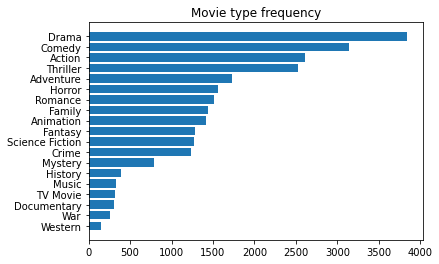

In [213]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
dis=lab1
a = dis['label']
b = dis['count']
plt.barh(a, b)  
plt.title('Movie type frequency')
plt.show()

In [214]:
mystery=dx.loc[dx['label'] == 'Mystery']
mystery

,title,id,overview,genre_ids,popularity,label
56,Zone 414,675319,In the near future on a colony of state-of-the...,9648,469.457,Mystery
85,Malignant,619778,Madison is paralyzed by shocking visions of gr...,9648,159.224,Mystery
89,Escape Room: Tournament of Champions,585216,Six people unwittingly find themselves locked ...,9648,145.097,Mystery
165,Gone Girl,210577,With his wife's disappearance having become th...,9648,53.371,Mystery
182,Antlers,516329,A young teacher discovers that her troubled st...,9648,37.413,Mystery
...,...,...,...,...,...,...
25867,Psycho II,10576,After years of treatment at a mental instituti...,9648,14.287,Mystery
25942,Censor,663866,Film censor Enid takes pride in her meticulous...,9648,11.037,Mystery
25989,The Long Goodbye,1847,Detective Philip Marlowe tries to help a frien...,9648,10.533,Mystery
26087,Anatomy of a Murder,93,Semi-retired Michigan lawyer Paul Biegler take...,9648,11.030,Mystery


In [215]:
dx.loc[(dx['title'] == 'Zone 414')]

,title,id,overview,genre_ids,popularity,label
54,Zone 414,675319,In the near future on a colony of state-of-the...,878,469.457,Science Fiction
55,Zone 414,675319,In the near future on a colony of state-of-the...,53,469.457,Thriller
56,Zone 414,675319,In the near future on a colony of state-of-the...,9648,469.457,Mystery


In [216]:
dx.loc[(dx['label'] == 'Drama') & (dx['popularity']>10)].head(20)

,title,id,overview,genre_ids,popularity,label
22,Eternals,524434,The Eternals are a team of ancient aliens who ...,18,1337.989,Drama
73,House of Gucci,644495,"When Patrizia Reggiani, an outsider from humbl...",18,245.070,Drama
90,Parallel Mothers,766798,Two unmarried women who have become pregnant b...,18,183.562,Drama
93,The Ice Road,646207,After a remote diamond mine collapses in far n...,18,135.177,Drama
99,Annette,424277,"The story of Henry, a stand-up comedian with a...",18,168.570,Drama
102,Don't Look Up,646380,Two astronomers go on a media tour to warn hum...,18,111.475,Drama
108,Cry Macho,749274,"Mike Milo, a one-time rodeo star and washed-up...",18,98.773,Drama
110,West Side Story,511809,Two youngsters from rival New York City gangs ...,18,80.181,Drama
114,Silent Night,664574,"Nell, Simon, and their boy Art are ready to we...",18,70.971,Drama
115,Stillwater,616651,"Bill Baker, an American oil-rig roughneck from...",18,78.493,Drama


In [217]:
dx.loc[dx['popularity']>50]

,title,id,overview,genre_ids,popularity,label
0,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,16,2734.004,Animation
1,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,35,2734.004,Comedy
2,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,10751,2734.004,Family
3,Encanto,568124,"The tale of an extraordinary family, the Madri...",12,2744.462,Adventure
4,Encanto,568124,"The tale of an extraordinary family, the Madri...",16,2744.462,Animation
...,...,...,...,...,...,...
4856,"Love, Rosie",200727,"Since the moment they met at age 5, Rosie and ...",10749,55.229,Romance
5267,Mickey and Minnie Wish Upon a Christmas,864390,"After a series of mishaps, Mickey, Minnie and ...",16,51.563,Animation
5385,Van Helsing,7131,Famed monster slayer Gabriel Van Helsing is di...,27,50.462,Horror
5386,Van Helsing,7131,Famed monster slayer Gabriel Van Helsing is di...,12,50.462,Adventure


Section 3: Recommendation by **category** 

In [224]:
A=['Action', 'Music', 'Horror', 'History', 'Crime', 'Comedy', 'Mystery']
B=['Adventure', 'Animation', 'Documentary', 'Family']
C=['Action', 'Adventure', 'Comedy', 'Fantasy']
# list C included most popular label Top 4

In [225]:
i=input('Select the genre you interested:')

Select the genre you interested:War


In [226]:
from random import choice
if i in A:
  x=choice(A)
  print(x)
elif i in B: 
  x=choice(B)
  print(x)
else: 
  x=choice(C)
  print(x)

Comedy


In [227]:
print('x=', x)
print('i=', i)

x= Comedy
i= War


In [229]:
data3=dx.loc[(dx['label'] == x)].head(10)
data3

,title,id,overview,genre_ids,popularity,label
1,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,35,2734.004,Comedy
5,Encanto,568124,"The tale of an extraordinary family, the Madri...",35,2744.462,Comedy
12,Ron's Gone Wrong,482321,"In a world where walking, talking, digitally c...",35,2221.171,Comedy
36,The Boss Baby: Family Business,459151,The Templeton brothers — Tim and his Boss Baby...,35,633.597,Comedy
48,The Addams Family 2,639721,The Addams get tangled up in more wacky advent...,35,471.517,Comedy
53,PAW Patrol: The Movie,675445,Ryder and the pups are called to Adventure Cit...,35,475.101,Comedy
61,Ghostbusters: Afterlife,425909,When a single mom and her two kids arrive in a...,35,374.068,Comedy
69,Sing 2,438695,Buster and his new cast now have their sights ...,35,309.915,Comedy
103,Don't Look Up,646380,Two astronomers go on a media tour to warn hum...,35,111.475,Comedy
113,Silent Night,664574,"Nell, Simon, and their boy Art are ready to we...",35,70.971,Comedy


In [230]:
data4=dx.loc[(dx['label'] == i)].head(10)
data4

,title,id,overview,genre_ids,popularity,label
157,1917,530915,"At the height of the First World War, two youn...",10752,43.188,War
226,The Tragedy of Macbeth,591538,"Macbeth, the Thane of Glamis, receives a proph...",10752,18.915,War
424,Benediction,399178,The story of soldier and poet Siegfried Sassoo...,10752,5.005,War
588,Narvik: Hitler's First Defeat,619930,"April, 1940. The eyes of the world are on Narv...",10752,2.107,War
781,Zeros and Ones,762433,Called to Rome to stop an imminent terrorist b...,10752,1448.865,War
792,Amina,885110,"In 16th-century Zazzau, now Zaria, Nigeria, Am...",10752,1056.288,War
1353,Hacksaw Ridge,324786,"WWII American Army Medic Desmond T. Doss, who ...",10752,174.553,War
1632,Fury,228150,"In the last months of World War II, as the All...",10752,117.672,War
1869,Inglourious Basterds,16869,"In Nazi-occupied France during World War II, a...",10752,100.361,War
2206,Justice Society: World War II,736069,When the Flash finds himself dropped into the ...,10752,87.708,War


In [233]:
if x!=i:
  frames = [data3, data4]
  result_3 = pd.concat(frames)
else: result_3 = dx.loc[(dx['label'] == i)].head(20)

In [234]:
result_3

,title,id,overview,genre_ids,popularity,label
1,Clifford the Big Red Dog,585245,As Emily struggles to fit in at home and at sc...,35,2734.004,Comedy
5,Encanto,568124,"The tale of an extraordinary family, the Madri...",35,2744.462,Comedy
12,Ron's Gone Wrong,482321,"In a world where walking, talking, digitally c...",35,2221.171,Comedy
36,The Boss Baby: Family Business,459151,The Templeton brothers — Tim and his Boss Baby...,35,633.597,Comedy
48,The Addams Family 2,639721,The Addams get tangled up in more wacky advent...,35,471.517,Comedy
53,PAW Patrol: The Movie,675445,Ryder and the pups are called to Adventure Cit...,35,475.101,Comedy
61,Ghostbusters: Afterlife,425909,When a single mom and her two kids arrive in a...,35,374.068,Comedy
69,Sing 2,438695,Buster and his new cast now have their sights ...,35,309.915,Comedy
103,Don't Look Up,646380,Two astronomers go on a media tour to warn hum...,35,111.475,Comedy
113,Silent Night,664574,"Nell, Simon, and their boy Art are ready to we...",35,70.971,Comedy
